In this file, currently we import functionality from run.ipynb and run the simulation

Author: 18BME2104 Kaushal

In [1]:
import import_ipynb
from run import Run
from constants import Constants

importing Jupyter notebook from run.ipynb
importing Jupyter notebook from batch.ipynb
importing Jupyter notebook from particle.ipynb
importing Jupyter notebook from field.ipynb
importing Jupyter notebook from constants.ipynb


In [2]:
run = Run()

In [3]:
constants = Constants()

In [4]:
# Create a batch
run.create_batch_with_file_initialization('H+', constants.constants['e'][0],\
                                          constants.constants['m_H'][0] * constants.constants['amu'][0], \
                                          100, 50, 'H ions')

In [5]:
#Take a Batch object from the list of created batches inside a run object
batch_object = run.batches[0]['H ions'] #The batch created

In [6]:
batch_object

In [7]:
#Get the particles in the batch
particles_in_the_batch = batch_object.particles

In [8]:
#Get a single particle from the batch
n_for_particle = 30
nth_particle = particles_in_the_batch[n_for_particle] 

In [9]:
#Print information about a single particle in a single batch inside a run object
print(nth_particle)

H+ 
 mass:1.6738233791328e-27 charge:1.6021766340000001e-19         
 position: (-0.5, 0.0, 0.0)         
 velocity: (4328.135274, -2726.982622, -17110.480553)         
 acceleration: (0, 0, 0)


## Check Maxwell sampling, perhaps vectors are not normalized
## Multiply sampled speed by unit vector directions

In [10]:
index_update = 0 #Update the first batch in batches

In [11]:
particle_track_indices = [10, 20, 30, 40]
dT = 10**(-6) # 10 seconds
stepT = 10**(-8) # 0.1 seconds time step
E_0 = 1000 # say 1000 Volts (voltage) per meter (size of chamber) 
E_dirn = [1,0,0] #in the x-direction [1,0,0]
B_0 = 10 * (10**(-3)) # Meant to say 10 mT 
B_dirn = [0,1,0] #in the y-direction [0,1,0]
argsE = [element * E_0 for element in E_dirn] # currently the uniform_E_field configuration is used
argsB = [element * B_0 for element in B_dirn]# currently the uniform_B_field configuration is used

In [12]:
positions_and_velocities = run.update_batch_with_unchanging_fields(0, dT, stepT, argsE, argsB, particle_track_indices)

what update wanted to return from batch.ipynb: {10: (array([-4.99961669e-01,  9.81452340e-05, -4.57207079e-05]), array([ 3833.0991939 ,  9814.523398  , -4572.07078902])), 20: (array([-4.99958601e-01,  2.08396536e-05,  3.73710938e-05]), array([4139.88657051, 2083.965365  , 3737.10938374])), 30: (array([-4.99945509e-01, -2.72698262e-05, -1.70644707e-04]), array([  5449.11182313,  -2726.982622  , -17064.47070729])), 40: (array([-5.00007221e-01,  1.14502446e-04,  6.82268591e-05]), array([ -722.06838427, 11450.244641  ,  6822.68591179]))}

what 0 th update reurned inside run.ipynb: {10: (array([-4.99961669e-01,  9.81452340e-05, -4.57207079e-05]), array([ 3833.0991939 ,  9814.523398  , -4572.07078902])), 20: (array([-4.99958601e-01,  2.08396536e-05,  3.73710938e-05]), array([4139.88657051, 2083.965365  , 3737.10938374])), 30: (array([-4.99945509e-01, -2.72698262e-05, -1.70644707e-04]), array([  5449.11182313,  -2726.982622  , -17064.47070729])), 40: (array([-5.00007221e-01,  1.14502446e-04, 


what 56 th update reurned inside run.ipynb: {10: (array([-0.48231313,  0.00559428,  0.0008047 ]), array([56781.34995399,  9814.523398  , 12070.75667461])), 20: (array([-0.48338722,  0.00118786,  0.00536689]), array([52791.28651834,  2083.965365  , 19390.01977691])), 30: (array([-0.47956923, -0.00155438, -0.00574411]), array([64570.6999992 , -2726.982622  ,  2130.24595101])), 40: (array([-0.48649067,  0.00652664,  0.00631797]), array([47020.58601887, 11450.244641  , 19560.22425477]))} 
what update wanted to return from batch.ipynb: {10: (array([-0.4817369 ,  0.00569242,  0.00093089]), array([57623.00493896,  9814.523398  , 12618.84646487])), 20: (array([-0.48285159,  0.0012087 ,  0.00556589]), array([53562.88182756,  2083.965365  , 19899.91684932])), 30: (array([-0.47891416, -0.00158165, -0.00571658]), array([65507.5051309 , -2726.982622  ,  2752.89506929])), 40: (array([-0.48601276,  0.00664114,  0.00651812]), array([47790.55213805, 11450.244641  , 20014.88442694]))}

what 57 th updat

In [13]:
pv_of_30th_particle = positions_and_velocities[30] #Check some error in values

In [14]:
pv_of_30th_particle

[(0,
  array([-4.99945509e-01, -2.72698262e-05, -1.70644707e-04]),
  array([  5449.11182313,  -2726.982622  , -17064.47070729])),
 (1,
  array([-4.99879812e-01, -5.45396524e-05, -3.40722016e-04]),
  array([  6569.64796796,  -2726.982622  , -17007.73092164])),
 (2,
  array([-4.99802916e-01, -8.18094787e-05, -5.10124670e-04]),
  array([  7689.64100197,  -2726.982622  , -16940.26541156])),
 (3,
  array([-4.99714826e-01, -1.09079305e-04, -6.78745464e-04]),
  array([  8808.98825899,  -2726.982622  , -16862.0793757 ])),
 (4,
  array([-4.99615550e-01, -1.36349131e-04, -8.46477254e-04]),
  array([  9927.58712259,  -2726.982622  , -16773.17899541])),
 (5,
  array([-4.99505097e-01, -1.63618957e-04, -1.01321297e-03]),
  array([ 11045.33503552,  -2726.982622  , -16673.57143428])),
 (6,
  array([-4.99383476e-01, -1.90888784e-04, -1.17884562e-03]),
  array([ 12162.12950911,  -2726.982622  , -16563.26483756])),
 (7,
  array([-4.99250697e-01, -2.18158610e-04, -1.34326830e-03]),
  array([ 13277.8681326

In [15]:
import matplotlib.pyplot as plt

In [16]:
positions_30 = []
velocities_30 = []
for i in range(len(pv_of_30th_particle)):
    positions_30.append(pv_of_30th_particle[i][1])
    velocities_30.append(pv_of_30th_particle[i][2])

In [17]:
positions_30

[array([-4.99945509e-01, -2.72698262e-05, -1.70644707e-04]),
 array([-4.99879812e-01, -5.45396524e-05, -3.40722016e-04]),
 array([-4.99802916e-01, -8.18094787e-05, -5.10124670e-04]),
 array([-4.99714826e-01, -1.09079305e-04, -6.78745464e-04]),
 array([-4.99615550e-01, -1.36349131e-04, -8.46477254e-04]),
 array([-4.99505097e-01, -1.63618957e-04, -1.01321297e-03]),
 array([-4.99383476e-01, -1.90888784e-04, -1.17884562e-03]),
 array([-4.99250697e-01, -2.18158610e-04, -1.34326830e-03]),
 array([-4.99106772e-01, -2.45428436e-04, -1.50637422e-03]),
 array([-4.98951715e-01, -2.72698262e-04, -1.66805669e-03]),
 array([-4.98785537e-01, -2.99968088e-04, -1.82820914e-03]),
 array([-4.98608255e-01, -3.27237915e-04, -1.98672514e-03]),
 array([-4.98419884e-01, -3.54507741e-04, -2.14349840e-03]),
 array([-4.98220440e-01, -3.81777567e-04, -2.29842275e-03]),
 array([-4.98009941e-01, -4.09047393e-04, -2.45139223e-03]),
 array([-4.97788406e-01, -4.36317220e-04, -2.60230101e-03]),
 array([-4.97555854e-01,

In [27]:
from mpl_toolkits import mplot3d

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

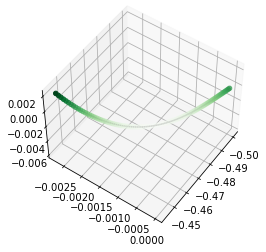

In [45]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(50, 35)

# Data for a three-dimensional line
zline = [elem[2] for elem in positions_30]
xline = [elem[0] for elem in positions_30]
yline = [elem[1] for elem in positions_30]
ax.plot3D(xline, yline, zline, 'gray')


# Data for three-dimensional scattered points
zdata = [elem[2] for elem in positions_30]
xdata = [elem[0] for elem in positions_30]
ydata = [elem[1] for elem in positions_30]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

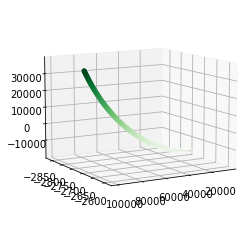

In [53]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(10, 60)

# Data for a three-dimensional line
zline = [elem[2] for elem in velocities_30]
xline = [elem[0] for elem in velocities_30]
yline = [elem[1] for elem in velocities_30]
ax.plot3D(xline, yline, zline, 'gray')


# Data for three-dimensional scattered points
zdata = [elem[2] for elem in velocities_30]
xdata = [elem[0] for elem in velocities_30]
ydata = [elem[1] for elem in velocities_30]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [18]:
speeds_30 = []
for i in range(len(velocities_30)):
    sp = (velocities_30[i][0] * velocities_30[i][0]) + (velocities_30[i][1] * velocities_30[i][1]) + (velocities_30[i][2] * velocities_30[i][2])
    speeds_30.append(sp)
speeds_30    

[328325414.401641,
 339859619.74636763,
 353539605.1740903,
 369364429.2402637,
 387332953.9094509,
 407443844.64158213,
 429695570.4962249,
 454086404.2548586,
 480614422.56114435,
 509277506.07917744,
 540073339.6697108,
 572999412.5843345,
 608053018.6775954,
 645231256.637039,
 684531030.2311532,
 725949048.5751957,
 769481826.4148777,
 815125684.4278837,
 862876749.5432009,
 912730955.2782271,
 964684042.0936321,
 1018731557.7659396,
 1074868857.7777972,
 1133091105.7259004,
 1193393273.7465355,
 1255770142.958703,
 1320216303.924784,
 1386726157.128707,
 1455293913.4715738,
 1525913594.7847037,
 1598579034.3600416,
 1673283877.497897,
 1750021582.0719495,
 1828785419.111486,
 1909568473.4008055,
 1992363644.0957425,
 2077163645.3572593,
 2163961007.002041,
 2252748075.1700435,
 2343517013.008931,
 2436259801.3753386,
 2530968239.5529094,
 2627633945.9870224,
 2726248359.0361686,
 2826802737.7398844,
 2929288162.6031947,
 3033695536.397479,
 3140015584.9776983,
 3248238858.115906,

In [25]:
dist_from_origin_30 = []
for i in range(len(positions_30)):
    dt = (positions_30[i][0] * positions_30[i][0]) + (positions_30[i][1] * positions_30[i][1]) + (positions_30[i][2] * positions_30[i][2])
    dist_from_origin_30.append(dt)
dist_from_origin_30

[0.2499455417143102,
 0.24987994591321397,
 0.24980322175414577,
 0.24971538002732727,
 0.24961643315470025,
 0.24950639518867143,
 0.249385281810668,
 0.24925311032950465,
 0.24910989967956226,
 0.2489556704187778,
 0.24879044472644712,
 0.24861424640083848,
 0.24842710085661987,
 0.2482290351220978,
 0.24802007783626975,
 0.24780025924568966,
 0.24756961120114665,
 0.24732816715415806,
 0.24707596215327665,
 0.24681303284021217,
 0.2465394174457685,
 0.2462551557855957,
 0.24596028925575858,
 0.2456548608281214,
 0.24533891504554914,
 0.24501249801692696,
 0.24467565741199704,
 0.24432844245601387,
 0.2439709039242193,
 0.2436030941361362,
 0.24322506694968335,
 0.24283687775511067,
 0.24243858346875638,
 0.24203024252662605,
 0.2416119148777949,
 0.24118366197763336,
 0.24074554678085744,
 0.24029763373440402,
 0.23983998877013174,
 0.23937267929734915,
 0.23889577419516997,
 0.2384093438046965,
 0.23791345992103285,
 0.23740819578512756,
 0.2368936260754474,
 0.23636982689948285,
 

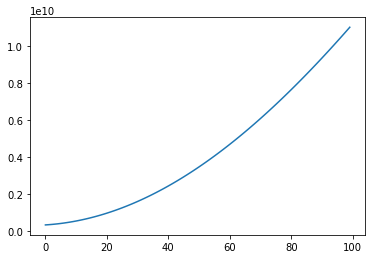

In [19]:
plt.plot(speeds_30)

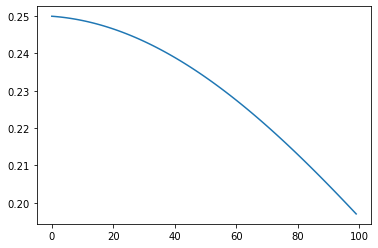

In [26]:
plt.plot(dist_from_origin_30)

In [20]:
speeds_30[len(speeds_30) - 1] / speeds_30[0]

33.55707402369505

### Checking for E = 0 and B = 0

In [21]:
run.create_batch_with_file_initialization('H+', constants.constants['e'][0],\
                                          constants.constants['m_H'][0] * constants.constants['amu'][0], \
                                          100, 2, 'H ions')



positions_and_velocities = run.update_batch_with_unchanging_fields(1, 2, 1, [0,0,0], [0,0,0], [0])

what update wanted to return from batch.ipynb: {0: (array([ 1579.129935, -5723.201089, -2863.641674]), array([ 1579.629935, -5723.201089, -2863.641674]))}

what 0 th update reurned inside run.ipynb: {0: (array([ 1579.129935, -5723.201089, -2863.641674]), array([ 1579.629935, -5723.201089, -2863.641674]))} 
what update wanted to return from batch.ipynb: {0: (array([  3158.75987 , -11446.402178,  -5727.283348]), array([ 1579.629935, -5723.201089, -2863.641674]))}

what 1 th update reurned inside run.ipynb: {0: (array([  3158.75987 , -11446.402178,  -5727.283348]), array([ 1579.629935, -5723.201089, -2863.641674]))} 


In [22]:
positions_and_velocities

{0: [(0,
   array([ 1579.129935, -5723.201089, -2863.641674]),
   array([ 1579.629935, -5723.201089, -2863.641674])),
  (1,
   array([  3158.75987 , -11446.402178,  -5727.283348]),
   array([ 1579.629935, -5723.201089, -2863.641674]))]}

##### The position is also not changing in zero E and B fields, the velocity not changing is expected but dependeing on the velocity the position should change.

In [23]:
zeroth_particle_data = positions_and_velocities[0]
zeroth_particle_positions = []
for i in range(len(zeroth_particle_data)):
    zeroth_particle_positions.append(zeroth_particle_data[i][1])

In [24]:
zeroth_particle_positions

[array([ 1579.129935, -5723.201089, -2863.641674]),
 array([  3158.75987 , -11446.402178,  -5727.283348])]

#### Tasks

1. Check the average speed of the maxwellian distribution of velocities and see if it matches with the temperature
2. Check with some E and B fields wheather the update gives the next set of velocities and positions
3. Define sputtering chamber, as position between some bounds; and track particles until they are there

4. Define stream of particles like in a plasma
5. Define E and B fields changing functionality, simple for exmaple changing the E field strength or Voltage

In [33]:
a = [np.array([1,2,3]), np.array([10,3,4])]

In [34]:
a

[array([1, 2, 3]), array([10,  3,  4])]

In [35]:
[elem[0] for elem in a]

[1, 10]